In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
music = pd.read_csv("MusicDataset.csv")
music.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
music = music.drop(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'loudness', 'mode', 'track_genre',
       'popularity', 'duration_ms', 'explicit','key', 'tempo', 'time_signature',
       'track_genre'], axis = 1)
music.describe

<bound method NDFrame.describe of         danceability  energy  speechiness  acousticness  instrumentalness  \
0              0.676  0.4610       0.1430        0.0322          0.000001   
1              0.420  0.1660       0.0763        0.9240          0.000006   
2              0.438  0.3590       0.0557        0.2100          0.000000   
3              0.266  0.0596       0.0363        0.9050          0.000071   
4              0.618  0.4430       0.0526        0.4690          0.000000   
...              ...     ...          ...           ...               ...   
113995         0.172  0.2350       0.0422        0.6400          0.928000   
113996         0.174  0.1170       0.0401        0.9940          0.976000   
113997         0.629  0.3290       0.0420        0.8670          0.000000   
113998         0.587  0.5060       0.0297        0.3810          0.000000   
113999         0.526  0.4870       0.0725        0.6810          0.000000   

        liveness  valence  
0         0.3

In [4]:
music['mood'] = music.loc[music['valence'] > 0.5, 'mood'] = 1
music['mood'] = music.loc[music['valence'] <= 0.5, 'mood'] = 0

In [5]:
music = music.drop(['valence'], axis = 1)
music.describe

<bound method NDFrame.describe of         danceability  energy  speechiness  acousticness  instrumentalness  \
0              0.676  0.4610       0.1430        0.0322          0.000001   
1              0.420  0.1660       0.0763        0.9240          0.000006   
2              0.438  0.3590       0.0557        0.2100          0.000000   
3              0.266  0.0596       0.0363        0.9050          0.000071   
4              0.618  0.4430       0.0526        0.4690          0.000000   
...              ...     ...          ...           ...               ...   
113995         0.172  0.2350       0.0422        0.6400          0.928000   
113996         0.174  0.1170       0.0401        0.9940          0.976000   
113997         0.629  0.3290       0.0420        0.8670          0.000000   
113998         0.587  0.5060       0.0297        0.3810          0.000000   
113999         0.526  0.4870       0.0725        0.6810          0.000000   

        liveness  mood  
0         0.3580

In [6]:
X = music.drop(columns = 'mood')
X

,danceability,energy,speechiness,acousticness,instrumentalness,liveness
0,0.676,0.4610,0.1430,0.0322,0.000001,0.3580
1,0.420,0.1660,0.0763,0.9240,0.000006,0.1010
2,0.438,0.3590,0.0557,0.2100,0.000000,0.1170
3,0.266,0.0596,0.0363,0.9050,0.000071,0.1320
4,0.618,0.4430,0.0526,0.4690,0.000000,0.0829
...,...,...,...,...,...,...
113995,0.172,0.2350,0.0422,0.6400,0.928000,0.0863
113996,0.174,0.1170,0.0401,0.9940,0.976000,0.1050
113997,0.629,0.3290,0.0420,0.8670,0.000000,0.0839
113998,0.587,0.5060,0.0297,0.3810,0.000000,0.2700


In [7]:
Y = music['mood']
Y

0         0
1         0
2         0
3         0
4         0
         ..
113995    0
113996    0
113997    0
113998    0
113999    0
Name: mood, Length: 114000, dtype: int64

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state = 88)

In [9]:
musicclf = RandomForestClassifier(max_depth = 15, min_samples_split = 10, random_state = 5)

In [10]:
musicclf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=15, min_samples_split=10, random_state=5)

In [11]:
y_pred = musicclf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
cm = confusion_matrix(Y_test,y_pred)

C:\Users\madzi\.anaconda\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


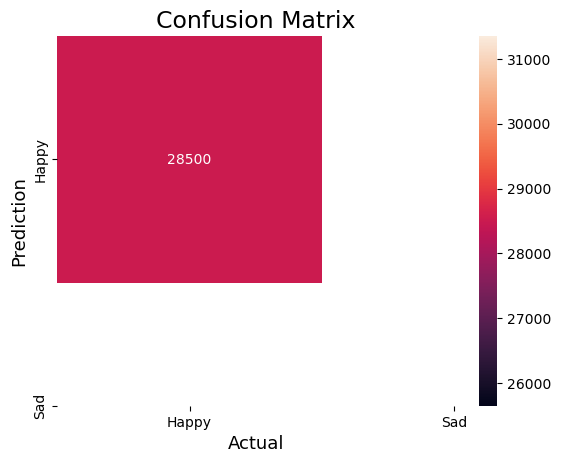

In [15]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Happy','Sad'],
            yticklabels=['Happy','Sad'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [16]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(82, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [17]:
model2.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [18]:
model2.fit(X_train, Y_train, epochs = 5)

Epoch 1/5
2672/2672 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9647 - loss: 0.2158
Epoch 2/5
2672/2672 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 1.0000 - loss: 4.6678e-05
Epoch 3/5
2672/2672 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 1.0000 - loss: 1.1238e-05
Epoch 4/5
2672/2672 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 1.0000 - loss: 2.9128e-06
Epoch 5/5
2672/2672 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 1.0000 - loss: 3.4435e-07


In [19]:
model2.evaluate(X_test, Y_test)

891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 1.0000 - loss: 1.8985e-09


[5.035812211673374e-09, 1.0]

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state = 88)

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(X_train, Y_train)

LinearRegression()

In [23]:
c = lr.intercept_
c

0.0

In [24]:
m = lr.coef_
m

array([0., 0., 0., 0., 0., 0.])

In [25]:
y_pred_train = lr.predict(X_train)
y_pred_train

array([0., 0., 0., ..., 0., 0., 0.])

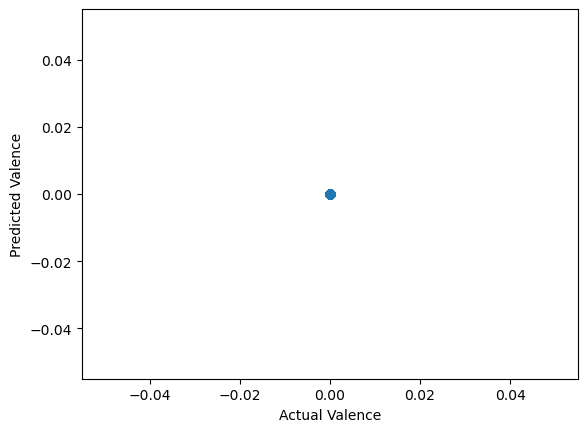

In [26]:
plt.scatter(Y_train, y_pred_train)
plt.xlabel("Actual Valence")
plt.ylabel("Predicted Valence")
plt.show()

In [27]:
r2_score(Y_train, y_pred_train)

1.0